<a href="https://colab.research.google.com/github/appaniakhil/Sentiment-Analysis-on-Amazon-mobile-reviews-dataset-431k-reviews-using-LSTMS/blob/main/amazon_reviews_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.sentiment.util import *
import pandas as pd

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# we have give a csv file which consists of all information about
# the products reviews
# loading the data using pandas' read_csv file.
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/ML/Amazon_Unlocked_Mobile.csv')

In [5]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [6]:
data.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [7]:
len(data)

413840

In [8]:
reviews=pd.DataFrame(data['Reviews'][:10000])
reviews

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...
...,...
9995,Words can't describe how unsatisfied I am. The...
9996,First of all the Iphone receive was in great c...
9997,Should of been black color but only had white ...
9998,The phone was NOT unlocked when I received it....


In [9]:
data.isnull().sum()


Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

As you can see there are 65171 Null values in Brand Name column, if we drop these Null values it means we will drop 65171 row which is a big loss of data. So instead of droping these Null values we will change the Null values into another Unknown brand Name, like this we will save our data

In [10]:
data['Brand Name'].fillna('Unknown', inplace = True)


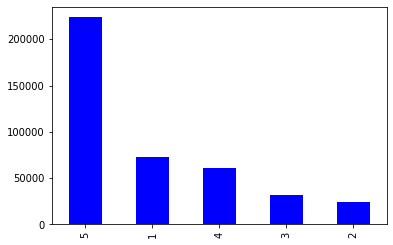

In [11]:
data['Rating'].value_counts().plot.bar(color='Blue')


In [12]:
data['sentiments'] = data['Rating'].apply(lambda x: 1 if x>=3 else 0)
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentiments
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


1    316762
0     97078
Name: sentiments, dtype: int64


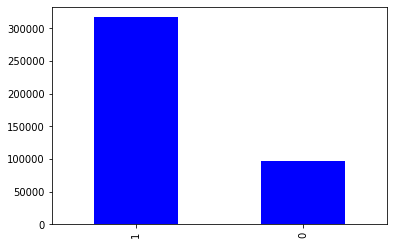

In [13]:
print(data['sentiments'].value_counts())
data['sentiments'].value_counts().plot.bar(color='Blue')

In [15]:
import nltk
nltk.download('vader_lexicon')
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Scores:
Compound score: is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [16]:
# only for Zero row of the reviews column
sentiment.polarity_scores(reviews.loc[0,'Reviews'])['compound']

0.8783

In [17]:
for sentences in reviews['Reviews']:
    s = sentiment.polarity_scores(sentences)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]))
    print(sentences)

Streaming output truncated to the last 5000 lines.
compound: 0.8612, 
neg: 0.08, 
neu: 0.764, 
pos: 0.155, 
The used Apple iPhone 3GS I ordered from Amazon Warehouse is incredible -- just like new! And it is so far superior to the Motorola Atrix I had. Touch works perfectly -- no accidental strokes, no opening something by mistake. Synced with all my info on computer quickly, so now have ALL contact info including ALL phone #s (not just mobile), addresses, & emails. Also calendar info and notes. I have ATT contract, so just inserted SIM and it was up and running. Shipping was fast. Very pleased with purchase.
compound: -0.4391, 
neg: 0.112, 
neu: 0.888, 
pos: 0.0, 
The product did not say that was not unlock, and I am very upset since I have to travel international and do not have more time.
compound: 0.5989, 
neg: 0.054, 
neu: 0.87, 
pos: 0.076, 
The 3G is really, really slow. I didn't want to sign a contract, but I needed a new phone. Perhaps the 3GS is slow compared with the 4 and 4

AttributeError: ignored

In [18]:
reviews['polarity_score'] = reviews['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])


In [19]:
reviews['neutral'] = reviews['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
reviews['negative'] = reviews['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
reviews['positive'] = reviews['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])


In [20]:
reviews.head()

,Reviews,polarity_score,neutral,negative,positive
0,I feel so LUCKY to have found this used (phone...,0.8783,0.796,0.015,0.189
1,"nice phone, nice up grade from my pantach revu...",0.9231,0.597,0.072,0.331
2,Very pleased,0.4927,0.238,0.000,0.762
3,It works good but it goes slow sometimes but i...,0.9185,0.500,0.000,0.500
4,Great phone to replace my lost phone. The only...,0.2942,0.897,0.038,0.065


In [21]:
reviews['sentiment']=''
reviews.head()

,Reviews,polarity_score,neutral,negative,positive,sentiment
0,I feel so LUCKY to have found this used (phone...,0.8783,0.796,0.015,0.189,
1,"nice phone, nice up grade from my pantach revu...",0.9231,0.597,0.072,0.331,
2,Very pleased,0.4927,0.238,0.000,0.762,
3,It works good but it goes slow sometimes but i...,0.9185,0.500,0.000,0.500,
4,Great phone to replace my lost phone. The only...,0.2942,0.897,0.038,0.065,


In [22]:
reviews.loc[reviews.polarity_score>0,'sentiment']='Positive'
reviews.loc[reviews.polarity_score==0,'sentiment']='Neutral'
reviews.loc[reviews.polarity_score<0,'sentiment']='Negative'
reviews.head()

,Reviews,polarity_score,neutral,negative,positive,sentiment
0,I feel so LUCKY to have found this used (phone...,0.8783,0.796,0.015,0.189,Positive
1,"nice phone, nice up grade from my pantach revu...",0.9231,0.597,0.072,0.331,Positive
2,Very pleased,0.4927,0.238,0.000,0.762,Positive
3,It works good but it goes slow sometimes but i...,0.9185,0.500,0.000,0.500,Positive
4,Great phone to replace my lost phone. The only...,0.2942,0.897,0.038,0.065,Positive


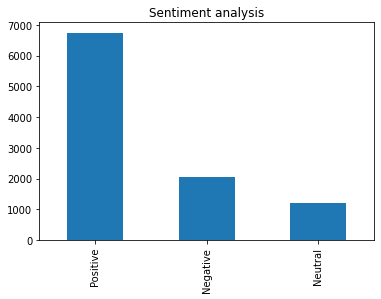

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
reviews.sentiment.value_counts().plot(kind='bar', title="Sentiment analysis")

Separate Dependent and Idependent Features

In [24]:
# Dependent Features
y = data['sentiments']

# Independent Features
X = data.drop('sentiments', axis=1)

Porter Stemmer
Change the words into its root words

In [27]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
messages = X.copy()
stopwords = set(stopwords.words('english'))

In [29]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Reviews'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
corpus[1]

'nice phone nice grade pantach revu clean set easi set never android phone fantast say least perfect size surf social media great phone samsung'

Tokenizing

In [33]:
voc_size = 50000
max_length = 150
embedding_features = 32

In [34]:
tokenizer = Tokenizer(num_words = voc_size, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)

Here, the value of oov_token is set to be ‘OOV’. That means any unknown words will be replaced by oov_token

Embedding

In [35]:
sequences = tokenizer.texts_to_sequences(corpus)
embedded_docs = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
embedded_docs[0]

array([ 117, 1543,  224,    4,    2,  185,    4,  220,    2,  382,  358,
        208,  564,    7,  368,    8,  115,    7,  388,  977, 1036,  100,
         39,  208,   82,   73,   21, 1065, 3083,  143,    4,    2,   56,
         73,  372,   13,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [36]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [37]:
X_final.shape, y_final.shape


((413840, 150), (413840,))

Model Creation

In [38]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Embedding(voc_size, embedding_features, input_length=max_length))
model.add(Dropout(0.33))
model.add(LSTM(100))
model.add(Dropout(0.33))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           1600000   
                                                                 
 dropout (Dropout)           (None, 150, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2

Split Data into Train and Test

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

Model Training

In [40]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size=64)

Epoch 1/10
4333/4333 [==============================] - 948s 218ms/step - loss: 0.5472 - accuracy: 0.7660 - val_loss: 0.5452 - val_accuracy: 0.7646
Epoch 2/10
4333/4333 [==============================] - 930s 215ms/step - loss: 0.5266 - accuracy: 0.7690 - val_loss: 0.5215 - val_accuracy: 0.7646
Epoch 3/10
4333/4333 [==============================] - 927s 214ms/step - loss: 0.5310 - accuracy: 0.7658 - val_loss: 0.5457 - val_accuracy: 0.7646
Epoch 4/10
4333/4333 [==============================] - 946s 218ms/step - loss: 0.5443 - accuracy: 0.7658 - val_loss: 0.5447 - val_accuracy: 0.7646
Epoch 5/10
4333/4333 [==============================] - 941s 217ms/step - loss: 0.5334 - accuracy: 0.7659 - val_loss: 0.5438 - val_accuracy: 0.7654
Epoch 6/10
4333/4333 [==============================] - 938s 216ms/step - loss: 0.5349 - accuracy: 0.7701 - val_loss: 0.5429 - val_accuracy: 0.7661
Epoch 7/10
4333/4333 [==============================] - 956s 221ms/step - loss: 0.4879 - accuracy: 0.7871 - val_

Performance Metrics and Accuracy

In [41]:
y_predict = ((model.predict(X_test)>0.5).astype('int32'))

Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[ 26283,   5868],
       [  4080, 100337]])

Accuracy Score

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9271571671255345